# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.31 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. Multi-agent Algorithm



### Hyperparameters

In [7]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0      # L2 weight decay

### Traing Multi-Agents with DDPG

Episode 100	Score 100: 0.00 	
Episode 200	Score 100: 0.00 	
Episode 300	Score 100: 0.00 	
Episode 400	Score 100: 0.00 	
Episode 500	Score 100: 0.00 	
Episode 600	Score 100: 0.00 	
Episode 700	Score 100: 0.00 	
Episode 800	Score 100: 0.00 	
Episode 900	Score 100: 0.00 	
Episode 1000	Score 100: 0.00 	
Episode 1100	Score 100: 0.00 	
Episode 1200	Score 100: 0.00 	
Episode 1300	Score 100: 0.00 	
Episode 1400	Score 100: 0.00 	
Episode 1500	Score 100: 0.00 	
Episode 1600	Score 100: 0.00 	
Episode 1700	Score 100: 0.01 	
Episode 1800	Score 100: 0.01 	
Episode 1900	Score 100: 0.01 	
Episode 2000	Score 100: 0.00 	
Episode 2100	Score 100: 0.01 	
Episode 2200	Score 100: 0.01 	
Episode 2300	Score 100: 0.03 	
Episode 2400	Score 100: 0.02 	
Episode 2500	Score 100: 0.02 	
Episode 2600	Score 100: 0.03 	
Episode 2700	Score 100: 0.06 	
Episode 2800	Score 100: 0.05 	
Episode 2900	Score 100: 0.04 	
Episode 3000	Score 100: 0.07 	
Episode 3100	Score 100: 0.10 	
Episode 3200	Score 100: 0.10 	
Episode 3300	Scor

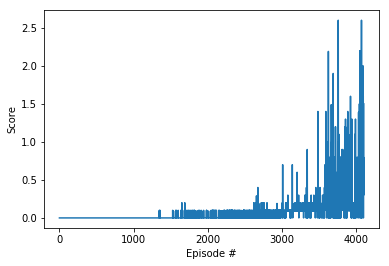

In [8]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# Instantiate Agent
from ddpg_agent import Agent
env_info = env.reset(train_mode=True)[brain_name]  
random_seed = 12345
agent = Agent(state_size, action_size, num_agents, random_seed,
                BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY)


def multi_ddpg_train(num_episodes=15000, max_t=1000, stepsize = 100):
    
    stepsize = stepsize
    scores = []                                          
    scores_window = deque(maxlen=stepsize)               # last X scores
    
    

    for i in range(1,num_episodes+1):
        rewards = []
        score = np.zeros(num_agents)                                
        env_info = env.reset(train_mode=True)[brain_name]  
        agent.reset()                                      
        state = env_info.vector_observations                    # get initial state
        for t in range(max_t):
            action = agent.act(state)                   
            env_info = env.step(action)[brain_name]        
            next_state = env_info.vector_observations   
            reward = env_info.rewards                
            done = env_info.local_done                 
            
            agent.step(state, action, reward, next_state, done) # update agent
                
            state = next_state                            
            rewards.append(reward)  #add rewards
            
            if np.any(done):                                       
                break
                
        episode_reward = np.max(np.sum(rewards,axis=0))            
        
        scores.append(episode_reward)                              
        scores_window.append(episode_reward)                        

        
        if (i % 100 == 0):
            print('\rEpisode {}\tScore 100: {:.2f} \t'.format(i, np.mean(scores_window)))
        
            
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i-stepsize, np.mean(scores_window)))
            agent.checkpoint()
            break   

    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()    


# train the agent
multi_ddpg_train()

In [9]:
env.close()